# 🤖 Modeling

Notebook ini digunakan untuk membangun dan mengevaluasi model prediksi keterlambatan pengiriman barang.

---

### 🛠️ Langkah-langkah Modeling

1. **Persiapan Data**
   - Pemisahan fitur (X) dan label target (y)
   - Pembagian data ke dalam training set dan testing set (80:20)

2. **Model yang Digunakan**
   - `Decision Tree Classifier`
   - `Random Forest Classifier`
   - `HistGradient Boosting Classifier`

3. **Pelatihan Model**
   - Melatih ketiga model menggunakan data latih (`fit()`)

4. **Evaluasi Model**
   - Mengukur performa menggunakan metrik berikut:
     - Akurasi
     - Confusion Matrix
     - Classification Report (Precision, Recall, F1-score)
   - Evaluasi dilakukan pada data uji (`predict()`)

5. **Visualisasi Hasil**
   - Menampilkan perbandingan akurasi antar model dalam bentuk bar chart
   - Menampilkan confusion matrix secara visual untuk model terpilih




In [1]:
# STEP 1: Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# STEP 2: Load Data hasil Preprocessing
df = pd.read_csv('../data/processed/final_dataset_pengiriman_preprocessed.csv')

In [38]:
# STEP 3: TRAIN TEST SPLIT 
# Data dibagi menjadi data pelatihan dan data pengujian (80:20) agar model bisa diuji di data yang belum pernah dilihat sebelumnya.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# STEP 4: LATIH MODEL 
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "HistGradient Boosting Classifier": HistGradientBoostingClassifier(random_state=42)
}


📌 Model: Decision Tree
Training model...
Akurasi: 0.9114
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1834
           1       0.64      0.48      0.55       231

    accuracy                           0.91      2065
   macro avg       0.79      0.72      0.75      2065
weighted avg       0.90      0.91      0.91      2065



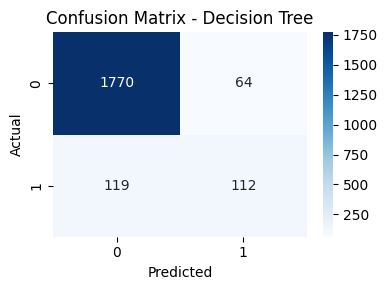

In [40]:
# STEP 5: EVALUASI MODEL 
# Model diuji terhadap data testing dan hasilnya diukur menggunakan akurasi, classification report, dan confusion matrix.
print("\n📌 Model: Decision Tree")
print("Training model...")

# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)

# Training
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


📌 Model: Random Forest
Training model...
Akurasi: 0.9177
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1834
           1       0.84      0.32      0.47       231

    accuracy                           0.92      2065
   macro avg       0.88      0.66      0.71      2065
weighted avg       0.91      0.92      0.90      2065



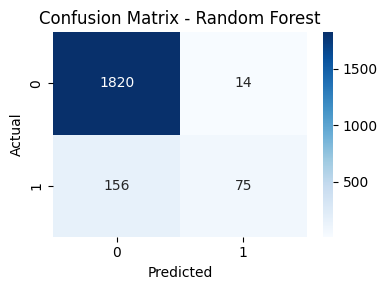

In [41]:
print("\n📌 Model: Random Forest")
print("Training model...")

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Training
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


📌 Model: HistGradient Boosting Classifier
Training model...
Akurasi: 0.8954
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1834
           1       0.59      0.22      0.32       231

    accuracy                           0.90      2065
   macro avg       0.75      0.60      0.63      2065
weighted avg       0.87      0.90      0.87      2065



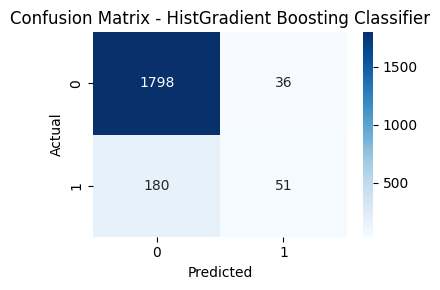

In [42]:
print("\n📌 Model: HistGradient Boosting Classifier")
print("Training model...")

# Inisialisasi model
model = HistGradientBoostingClassifier(random_state=42)

# Training
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - HistGradient Boosting Classifier')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [43]:
# STEP 6: Simpan skor akurasi tiap model
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

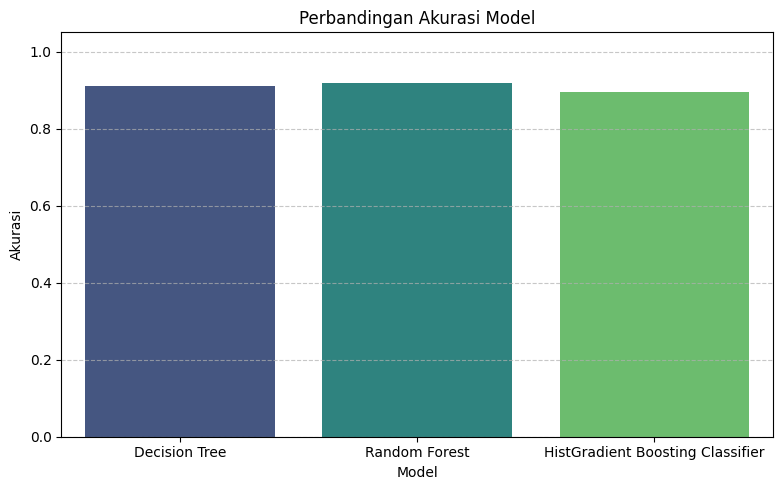

In [44]:
# STEP 7: Visualisasi akurasi dalam bar chart
acc_df = pd.DataFrame({
    "Model": list(accuracy_scores.keys()),
    "Accuracy": list(accuracy_scores.values())
})

# Buat plot
plt.figure(figsize=(8, 5))
sns.barplot(data=acc_df, x="Model", y="Accuracy", hue="Model", palette="viridis", legend=False)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()